<a href="https://colab.research.google.com/github/Lubraca/Supervised_ML_Models/blob/Loan_Deafult_Coursera/Classification/Loan_Default_Prediction/LoanDefaultPrediction_Coursera_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans.

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021.

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active.

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
!pip install imbalanced-learn==0.14.0

In [3]:
# Import any other packages you may want to use

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, recall_score
# Imblearn for SMOTE and the ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [4]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

## Missing Values Validation

In [7]:
# Calculate the percentage of NaNs per column
missing_data = train_df.isnull().sum() / len(train_df)
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

print("### Percentage of Missing Data per Column ###")
print(missing_data.apply(lambda x: f'{x:.2%}'))
print("-" * 50)

# Visualization Option (if you have many columns with NaNs)
if not missing_data.empty:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=missing_data.index, y=missing_data.values * 100)
    plt.title('Percentage of Missing Values')
    plt.ylabel('% Missing')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


### Percentage of Missing Data per Column ###
Series([], dtype: float64)
--------------------------------------------------


There is no missing data in the dataset.

## Outliers Validation for numerical features

### Outlier Visualization for 9 Numerical Features ###


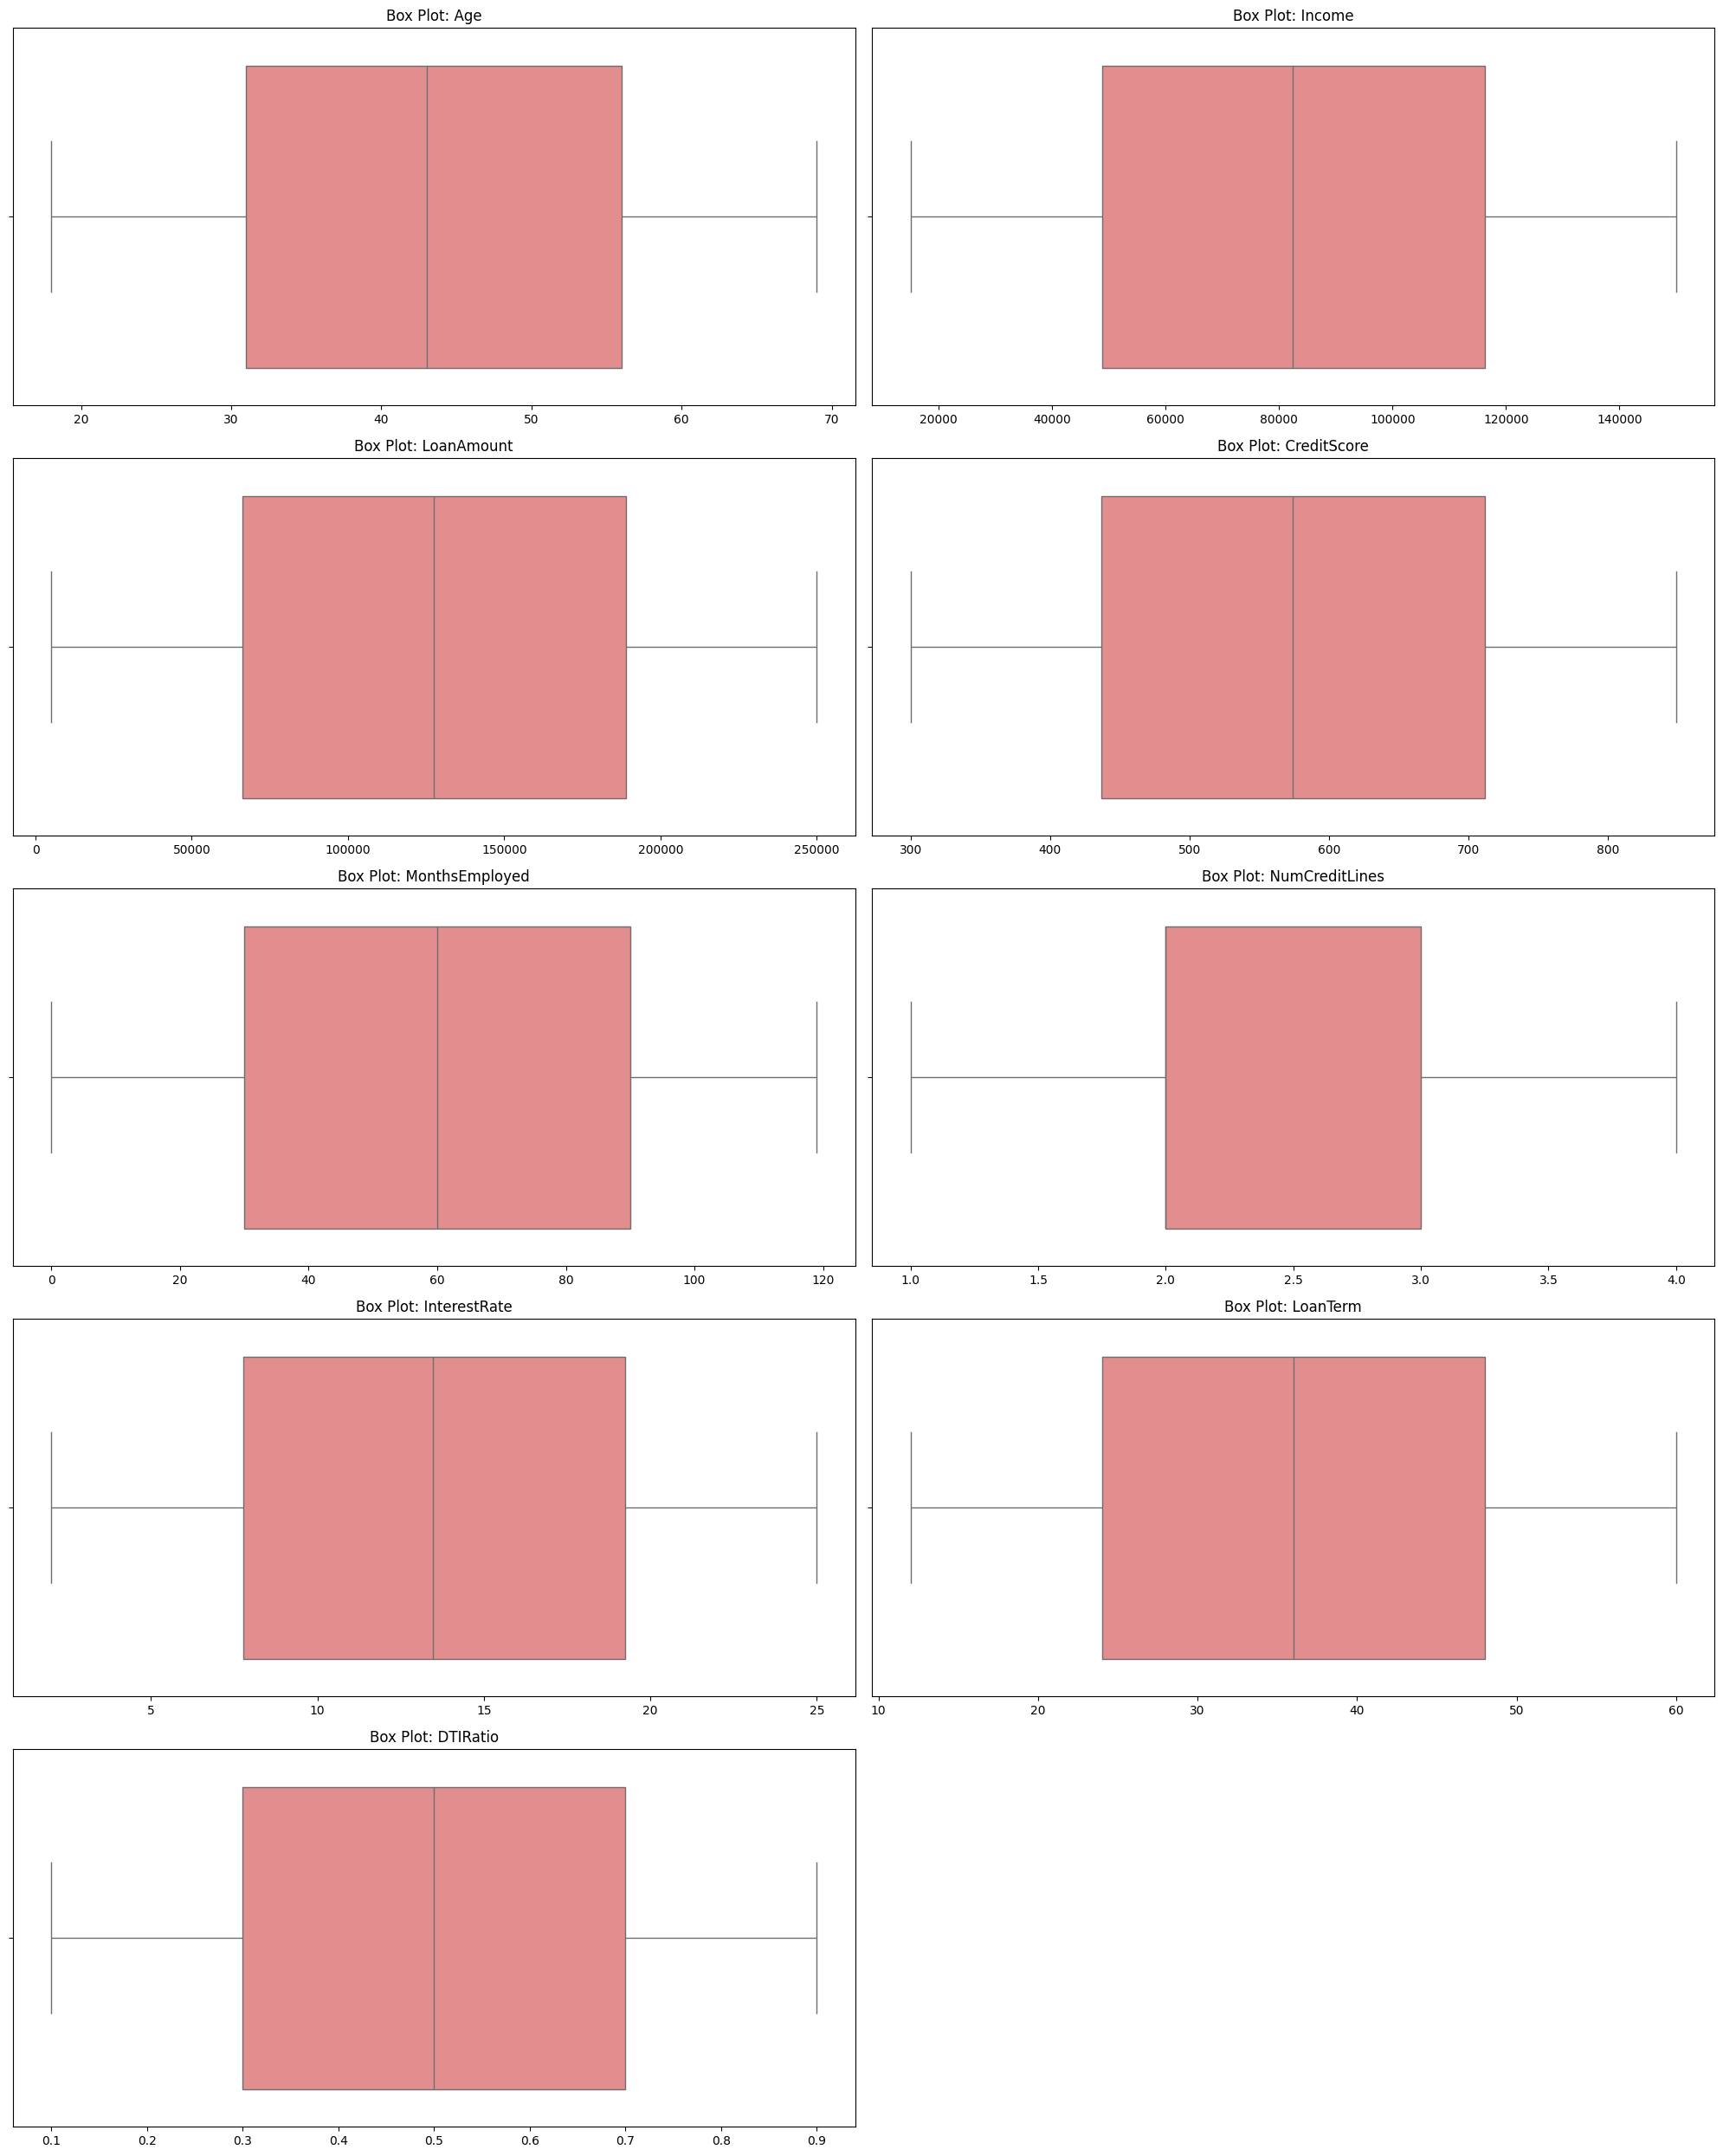

In [8]:
#Outlier Identification (Numerical Columns Only)

# Select only numerical columns
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()

# Exclude the binary target ('Default') if it's in the list
if 'Default' in num_cols:
    num_cols.remove('Default')

# Dynamic layout: 3 columns wide
n_cols = 2
n_rows = int(np.ceil(len(num_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10 * n_cols, 5 * n_rows))
axes = axes.flatten()

print(f"### Outlier Visualization for {len(num_cols)} Numerical Features ###")

for i, col in enumerate(num_cols):
    sns.boxplot(x=train_df[col], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Box Plot: {col}')
    axes[i].set_xlabel('')

# Remove empty axes
for j in range(len(num_cols), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Next Steps (Decision):
# - If the Box Plot is highly skewed:
#   1. Apply a Log Transformation (if all data > 0).
#   2. Use the IQR method to 'cap' (limit) extreme values instead of removing rows.

There is no outlier in the numerical features.

In [9]:
#Visualization of how balanced is the dataset for the feature to be determined with the predictive models

train_df['Default'].value_counts(normalize = True)

,proportion
Default,
0,0.883872
1,0.116128


Unbalanced problem.The data is a unbalanced classification problem in the target feature

## Analysing the categorical features

For the purpose of taining, 'LoanID' is not relevant because it is as Primary key of the dataset.
It's important to visualize how each categorical feature relates is proportion with the target feature

In [10]:
cat_cols = train_df.select_dtypes(include=['object']).columns.drop('LoanID')

/tmp/ipython-input-2489145811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2489145811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2489145811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2489145811.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-2489145811.py:23: FutureWarning: 

Passin

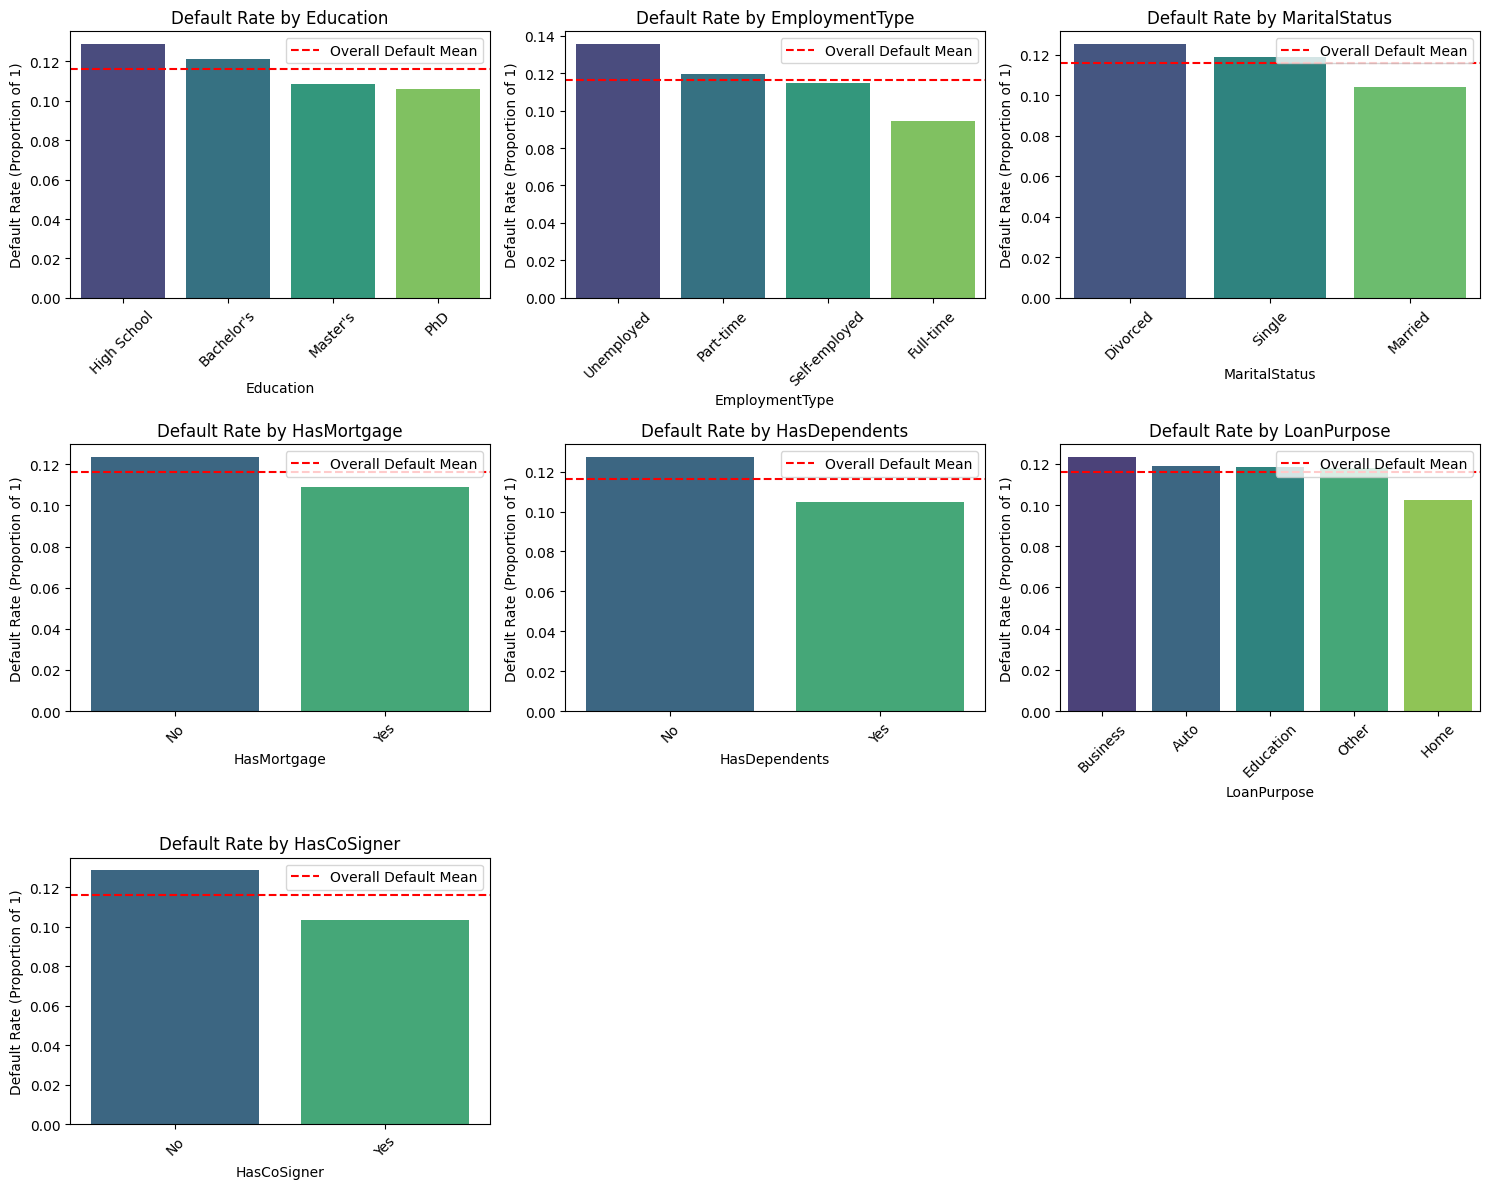

In [11]:
# Calculate the ideal subplot layout
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

# Vertical size is scaled based on the number of rows
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(5 * n_cols, 4 * n_rows) # Adjust figsize for a cleaner look
)

# Flatten the axes array for easy iteration, handling cases with 1 row or 1 column
axes = axes.flatten()

# Loop to generate the bar plots
for i, col in enumerate(cat_cols):

    # Calculate the GroupBy (Default Rate per Category)
    # The mean of a 0/1 column gives the proportion of '1's (Default rate)
    plot_data = train_df.groupby(col)['Default'].value_counts(normalize = True).loc[:,1].sort_values(ascending=False)

    # Use Seaborn for the bar plot on the correct axis
    sns.barplot(
        x=plot_data.index,
        y=plot_data.values,
        ax=axes[i],
        palette='viridis'
    )

    # Add titles and formatting
    axes[i].set_title(f'Default Rate by {col}', fontsize=12)
    axes[i].set_ylabel('Default Rate (Proportion of 1)')
    axes[i].set_xlabel(col)

    # Rotate x-axis labels for long category names
    axes[i].tick_params(axis='x', rotation=45)

    # Optional: Add a horizontal line for the dataset's overall mean default rate for comparison
    axes[i].axhline(train_df['Default'].mean(), color='red', linestyle='--', label='Overall Default Mean')
    axes[i].legend()

#  Remove empty axes (if the number of plots is not a perfect multiple of n_cols)
for j in range(len(cat_cols), n_rows * n_cols):
    fig.delaxes(axes[j])

#  Adjust layout to prevent overlap and show the figure
plt.tight_layout()
plt.show()

The results above show that the proportion of Default is well-balanced among the categorical classes

## Features Correlations

<Axes: title={'center': '### Correlation Matrix ###'}>

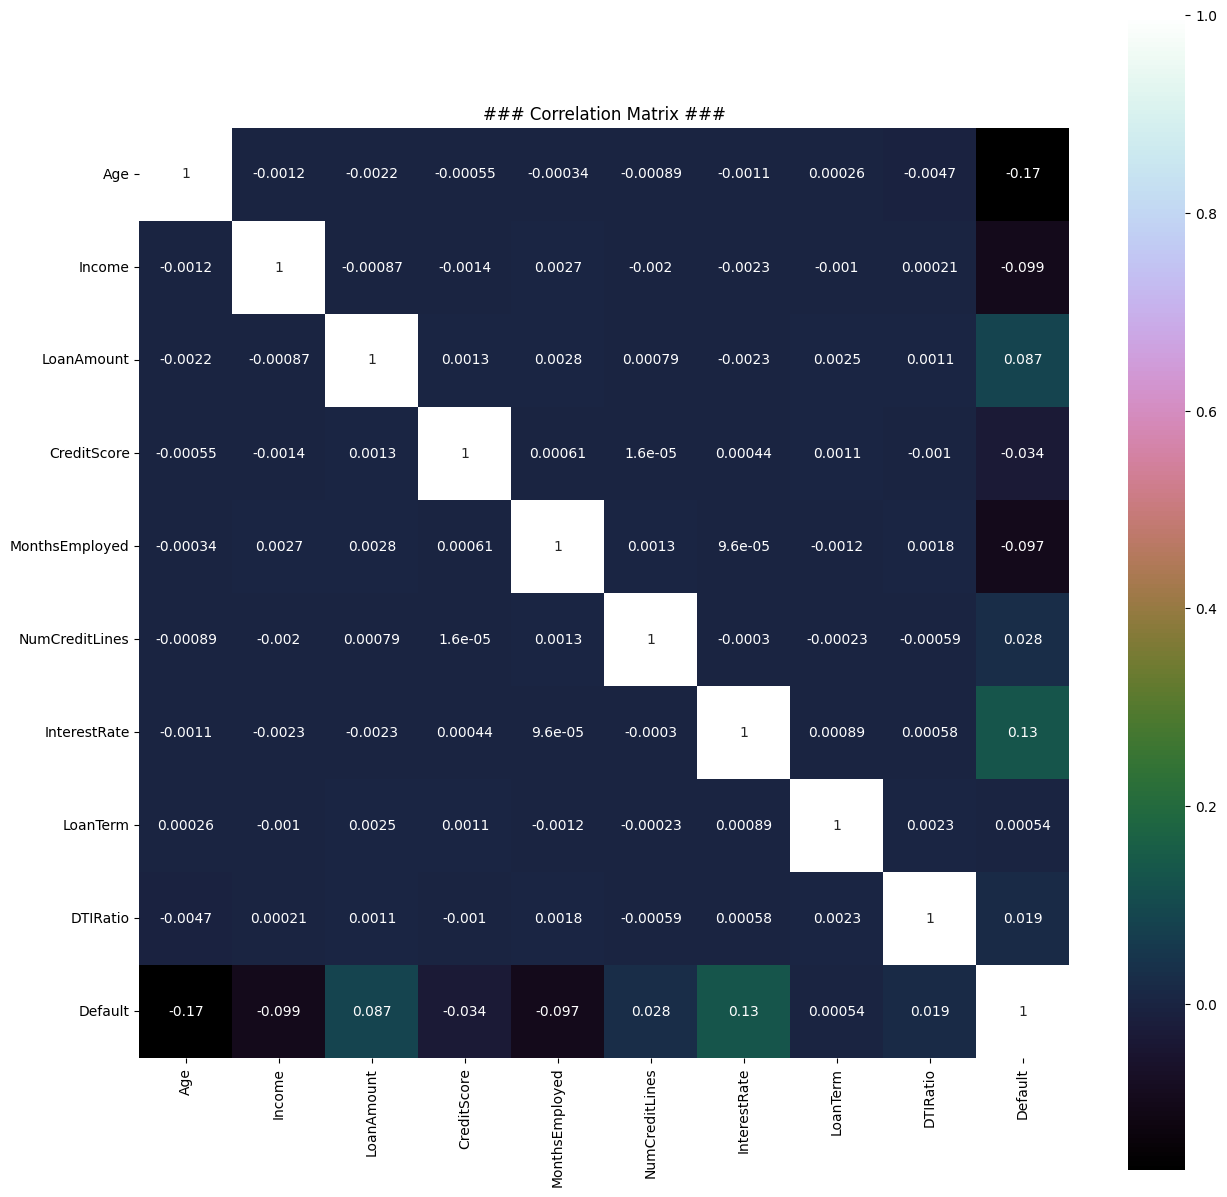

In [14]:
correlation = train_df.select_dtypes(include=np.number).corr()
plt.figure(figsize = (15,15))
plt.title("### Correlation Matrix ###")
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

## EDA Conclusion

The dataset availablle for the project has a high data-quality. The only fea

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
# apply le on categorical feature columns
train_df[cat_cols] = train_df[cat_cols].apply(lambda col: le.fit_transform(col))
train_df[cat_cols].head(10)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,0,0,0,1,1,4,1
1,2,0,1,0,0,4,1
2,2,3,0,1,1,0,0
3,1,0,1,0,0,1,0
4,0,3,0,0,1,0,0
5,1,3,2,1,0,1,1
6,0,3,2,1,0,3,1
7,3,0,1,0,0,3,1
8,0,2,0,1,0,2,0
9,1,2,1,1,0,4,1


In [17]:
X = train_df.drop(columns= ['LoanID','Default'], axis = 1)
y = train_df['Default']

In [18]:
print(f'Shape of X:{X.shape}')
print(f'Shape of y:{y.shape}')

Shape of X:(255347, 16)
Shape of y:(255347,)


## Classification Models

In [19]:
# Use the full dataset for cross-validation
X_cv, y_cv = X, y


# --- PREPROCESSING PIPELINE ---

# Define the preprocessing steps for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        # Numeric: Standardize the scale
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough' # Keep any other columns, though usually none are left
)

In [20]:
# --- MODEL DEFINITIONS ---

# Dictionary of your models
models = {}
# Models that generally benefit from balancing/SMOTE (Distance-based, Linear, Naive Bayes, NN)
models['SMOTE_Sensitive'] = [
    ('LR', LogisticRegression(random_state=42, max_iter=1000)),
    ('LDA', LinearDiscriminantAnalysis()),
 #   ('KNN', KNeighborsClassifier()), RUNNING TIME TOO LONG
    ('NB', GaussianNB()),
 #  ('NN', MLPClassifier(random_state=42, max_iter=500)) RUNNING TIME TOO LONG
]
# Models that are generally robust to imbalance (Tree-based, Ensemble)
models['Robust_To_Imbalance'] = [
    ('CART', DecisionTreeClassifier(random_state=42)),
    ('AB', AdaBoostClassifier(random_state=42)),
  # ('GBM', GradientBoostingClassifier(random_state=42)),
  #  ('RF', RandomForestClassifier(random_state=42)), RUNNING TIME TOO LONG
  #  ('ET', ExtraTreesClassifier(random_state=42)) RUNNING TIME TOO LONG
]


# --- EVALUATION FUNCTION ---

# Define the cross-validation splitter (Stratified for imbalance)
# 10 folds
cv_splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define a scorer. For imbalanced data, Recall (ability to catch defaults) is often key.
# make_scorer(recall_score, pos_label=1) ensures we are scoring the minority class (1)
scorer = make_scorer(recall_score, pos_label=1)

results_mean = []
model_names = []

def evaluate_model_cv(name, model, X_data, y_data, use_smote=False):
    """Creates a pipeline, performs Stratified K-Fold Cross-Validation, and prints results."""

    if use_smote:
        # Imblearn pipeline: Preprocessing -> SMOTE -> Model
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote', SMOTE(random_state=42)),
            ('classifier', model)
        ])
        pipeline_type = "SMOTE CV"
    else:
        # Standard Scikit-learn pipeline: Preprocessing -> Model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipeline_type = "Standard CV"

    print(f"\n--- Model: {name} ({pipeline_type} Pipeline) ---")

    # 1. Perform Cross-Validation
    # We use the custom 'scorer' (Recall for class 1)
    results = cross_val_score(
        estimator=pipeline,
        X=X_data,
        y=y_data,
        cv=cv_splitter,        # Use Stratified K-Fold
        scoring=scorer,        # Use the defined scoring metric (Recall of class 1)
        n_jobs=-1              # Use all available cores for speed
    )
    model_names.append(name)
    results_mean.append(results.mean())
    # 2. Evaluation
    print(f"CV Scores (Recall for Default=1): {results}")
    print(f"Mean CV Score: {results.mean():.4f} (Std. Dev.: {results.std():.4f})")

    # Note: Accuracy is a poor metric for imbalanced data, so we stick to Recall/F1

# --- RUN THE EVALUATION ---

print("### Running Stratified K-Fold Cross-Validation (10 Folds) ###")
print(f"Scoring Metric: Recall of Class 1 (Default)")

# A. Evaluate Models that benefit from SMOTE
for name, model in models['SMOTE_Sensitive']:
    evaluate_model_cv(name, model, X_cv, y_cv, use_smote=True)

# B. Evaluate Models that are Robust to Imbalance (No SMOTE needed)
for name, model in models['Robust_To_Imbalance']:
    evaluate_model_cv(name, model, X_cv, y_cv, use_smote=False)

### Running Stratified K-Fold Cross-Validation (10 Folds) ###
Scoring Metric: Recall of Class 1 (Default)

--- Model: LR (SMOTE CV Pipeline) ---
CV Scores (Recall for Default=1): [0.68094435 0.68263069 0.68667791 0.67150084 0.67498314 0.67633176
 0.68037761 0.68431703 0.67554806 0.68229342]
Mean CV Score: 0.6796 (Std. Dev.: 0.0045)

--- Model: LDA (SMOTE CV Pipeline) ---
CV Scores (Recall for Default=1): [0.68735245 0.68903879 0.69241147 0.67554806 0.67936615 0.68138908
 0.68813216 0.69072513 0.68094435 0.68667791]
Mean CV Score: 0.6852 (Std. Dev.: 0.0052)

--- Model: NB (SMOTE CV Pipeline) ---
CV Scores (Recall for Default=1): [0.66677909 0.66677909 0.68431703 0.65699831 0.65610249 0.66655428
 0.67262306 0.66812816 0.66644182 0.67419899]
Mean CV Score: 0.6679 (Std. Dev.: 0.0077)

--- Model: CART (Standard CV Pipeline) ---
CV Scores (Recall for Default=1): [0.23406408 0.22360877 0.23575042 0.2232715  0.23162508 0.22724208
 0.22285907 0.23473862 0.23946037 0.21888702]
Mean CV Score: 0.2

In [21]:
print(model_names)
print(np.round(results_mean,2))

['LR', 'LDA', 'NB', 'CART', 'AB', 'RF']
[0.68 0.69 0.67 0.23 0.04 0.05]


In [22]:
results_mean = list(np.round(results_mean,2))
model_names = list(model_names)

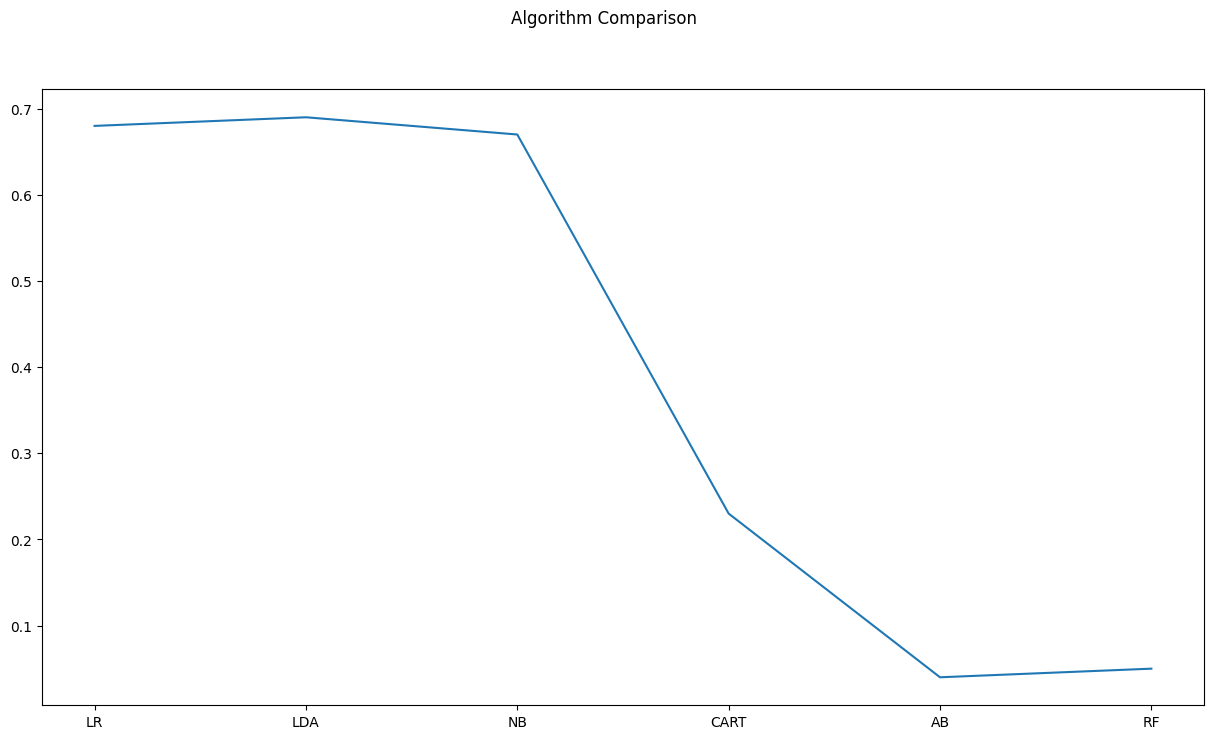

In [23]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
x_positions = np.arange(len(model_names))
ax.plot(results_mean)
ax.set_xticks(x_positions)
ax.set_xticklabels(model_names)
fig.set_size_inches(15,8)
plt.show()

Logistic Regression, Linear Discriminant Analysis and K-Neighbors are the best models, with the highests recall scores.
Model tunning is applied in the LR model, because there is less statistics requirements for its implementation (as normal distribuition for all classes, wich we did not chech earlier).


**negrito**## Model Tunning and GridSearch

In [24]:
# Grid Search: Logistic Regression
cv_splitter_gs = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the Pipeline with SMOTE and LR
# Use 'liblinear' solver because it supports both L1 and L2 penalties.
lr_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('lr_classifier', LogisticRegression(random_state=42, solver='liblinear', max_iter=1000))
])

# Define the parameter grid
# Note the prefix 'lr_classifier__' to target the final model in the pipeline
param_grid = {
    # Test L1 (Lasso) and L2 (Ridge) regularization
    'lr_classifier__penalty': ['l1', 'l2'],
    # Test different inverse regularization strengths (C)
    'lr_classifier__C': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=param_grid,
    cv=cv_splitter_gs,       # Use 5 folds for tuning speed
    scoring=scorer,          # Optimize for Recall of class 1
    n_jobs=-1,
    verbose=1
)

# Execute the Grid Search
grid_search.fit(X_cv, y_cv)

# Report Results
print("\n--- Grid Search Results ---")
print(f"Best Mean Recall Score: {grid_search.best_score_:.4f}")
print(f"Best Parameters: {grid_search.best_params_}")

# Final best model
best_lr_model = grid_search.best_estimator_
print("\nFinal tuned LR model is stored in 'best_lr_model'.")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

--- Grid Search Results ---
Best Mean Recall Score: 0.6799
Best Parameters: {'lr_classifier__C': 0.01, 'lr_classifier__penalty': 'l1'}

Final tuned LR model is stored in 'best_lr_model'.


In [25]:
best_lr_model

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age', 'Income',
                                                   'LoanAmount', 'CreditScore',
                                                   'MonthsEmployed',
                                                   'NumCreditLines',
                                                   'InterestRate', 'LoanTerm',
                                                   'DTIRatio'])])),
                ('smote', SMOTE(random_state=42)),
                ('lr_classifier',
                 LogisticRegression(C=0.01, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

## Create Dummys for categorical features in test_df



In [27]:
le = LabelEncoder()
# apply le on categorical feature columns
test_df[cat_cols] = test_df[cat_cols].apply(lambda col: le.fit_transform(col))
test_df[cat_cols].head(10)

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,1,0,0,1,0,4,0
1,1,2,2,0,0,1,1
2,0,0,2,1,1,4,1
3,0,3,0,0,0,1,0
4,3,3,2,1,0,0,0
5,3,1,1,1,0,2,0
6,0,0,0,1,0,2,0
7,3,3,2,0,1,1,1
8,1,0,1,1,1,4,1
9,0,0,2,1,0,4,0


In [28]:
predicted_probability = best_lr_model.predict_proba(test_df.drop(columns=['LoanID'], axis=1))

In [30]:
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability[:, 1]})

In [31]:
# 'prediction_df' dataframe as required for submission.
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.235034
1,JDL5RH07AM,0.111248
2,STAL716Y79,0.186540
3,SO0KKJ3IQB,0.652974
4,T99CWTYDCP,0.572629
5,0SNHFWV4UP,0.436780
6,S6ITP6LGYS,0.227765
7,A6I7U12IRJ,0.316471
8,8W6KY50JU4,0.292564
9,THFQ08OLMU,0.410971


In [32]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on the training data (X_cv, y_cv)
train_predicted_probabilities = best_lr_model.predict_proba(X_cv)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_cv, train_predicted_probabilities)

print(f"ROC AUC score on training data: {roc_auc:.4f}")

ROC AUC score on training data: 0.7455


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [33]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [34]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [35]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [36]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [37]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!